In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt

In [2]:
edge_list = [(0,1),(0,2),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [3]:
goal = 7

In [4]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [5]:
position = nx.spring_layout(G)

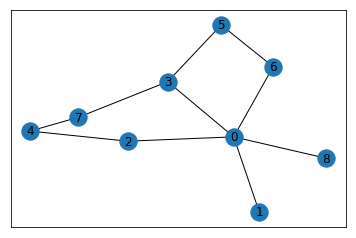

In [6]:
nx.draw_networkx_nodes(G,position)
nx.draw_networkx_edges(G,position)
nx.draw_networkx_labels(G,position)
plt.show()


In [7]:
SIZE_MATRIX = 9

In [8]:
R = np.matrix(np.ones(shape = (SIZE_MATRIX,SIZE_MATRIX)))
R *= -1

In [11]:
for edge in edge_list:
    print(edge)
    if edge[1] == goal:
        R[edge] = 100
        
    else:
        R[edge] =  0
        
    if edge[0] == goal:
        R[edge[::-1]] = 100
     
    else:
        R[edge[::-1]] = 0

(0, 1)
(0, 2)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [12]:
R[goal,goal] = 100

In [13]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [14]:
gamma = 0.8

In [15]:
Q = np.matrix(np.zeros([SIZE_MATRIX,SIZE_MATRIX]))

In [17]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row >= 0)[1]
    
    return available_actions

In [27]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size = 1))
    
    return next_action

In [35]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1]
    print('max_index', max_index.shape)
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
        
    max_value = Q[action, max_index]
    Q[current_state, action] = R[current_state, action] + gamma * max_value
    print("max_value" , Q[current_state, action])
    

In [36]:
initial_state = 0


In [37]:
available_actions = get_available_actions(initial_state)

In [38]:
print(available_actions)

[1 2 3 6 8]


In [39]:
action = sample_next_action(available_actions)

In [40]:
print(action)

6


In [41]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


In [42]:
for i in range(700):
    current_state = np.random.randint(0,int(Q.shape[0]))
    
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    
    update(current_state, action, gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (1,)
max_value 180.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 144.0
max_index (1,)
max_value 180.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 115.2
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 92.16000000000001
max_index (1,)
max_value 144.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 180.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 115.2
max_index (1,)
max_value 115.2
max_index (1,)
max_value 115.2
max_index (1,)
max_value 144.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 180.0
max_index (1,)
max_value 144.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 180.0
max_index (1,)
max_value 115.2
max_index (1,)
max_value 115.2
max_index (1,)
max

In [43]:
print("trained Q matrix")
pd.DataFrame(Q)

trained Q matrix


,0,1,2,3,4,5,6,7,8
0,0.000000,254.488843,318.111053,397.638817,0.000000,0.000000,254.488843,0.000000,254.488843
1,318.111053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,318.111053,0.000000,0.000000,0.000000,397.638817,0.000000,0.000000,0.000000,0.000000
3,317.638817,0.000000,0.000000,0.000000,0.000000,318.111053,0.000000,498.111053,0.000000
4,0.000000,0.000000,318.111053,0.000000,0.000000,0.000000,0.000000,497.048521,0.000000
5,0.000000,0.000000,0.000000,397.638817,0.000000,0.000000,254.488843,0.000000,0.000000
6,318.111053,0.000000,0.000000,0.000000,0.000000,318.111053,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,398.488843,397.638817,0.000000,0.000000,497.638817,0.000000
8,318.111053,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
print("Normalized Q matrix")
pd.DataFrame((Q/np.max(Q)) * 100)

Normalized Q matrix


,0,1,2,3,4,5,6,7,8
0,0.000000,51.090784,63.86348,79.82935,0.00000,0.00000,51.090784,0.000000,51.090784
1,63.863480,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000
2,63.863480,0.000000,0.00000,0.00000,79.82935,0.00000,0.000000,0.000000,0.000000
3,63.768675,0.000000,0.00000,0.00000,0.00000,63.86348,0.000000,100.000000,0.000000
4,0.000000,0.000000,63.86348,0.00000,0.00000,0.00000,0.000000,99.786688,0.000000
5,0.000000,0.000000,0.00000,79.82935,0.00000,0.00000,51.090784,0.000000,0.000000
6,63.863480,0.000000,0.00000,0.00000,0.00000,63.86348,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.00000,80.00000,79.82935,0.00000,0.000000,99.905195,0.000000
8,63.863480,0.000000,0.00000,0.00000,0.00000,0.00000,0.000000,0.000000,0.000000


In [45]:
current_state = 0
steps = [current_state]

In [47]:
while current_state != 7:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
        
    steps.append(next_step_index)
    current_state = next_step_index

In [48]:
print("Most effecient path")
print(steps)

Most effecient path
[0, 3, 3, 7]
